# Python Quick Start Guide (by task)

*Dave A. May (dmay@ucsd.edu)*

## Contents
1. [Reading a file](#sec-file)
  - ascii, binary, structured, CSV, Excel, NetCDF, HDF5, JSON, XML
2. [Sorting data](#sec-sort)
3. [File system manipulation](#sec-filesys)
  - Dealing with paths
  - Report, create and remove directories
3. [Interacting with the operating system](#sec-os)
  - Executing Unix commands
  - Changing your environment
4. [Interpolation](#sec-interpolation)
  - Interpolate to improve `pcolormesh()` result
5. [Visualizing data](#sec-viz)
  - Working with VTK files
  - Unstructured point clouds
6. Sparse linear algebra
7. Solving systems of linear equations

<a id='sec-file'></a>

----
## Reading a file

Before attempting to even open a file to read, we should know what the file type actually is, or more over what representation of the data is used within the file (for example ascii versus binary).
You can attempt to determine this using the package `mimetypes` and the method `guess_type()`.

In [1]:
import mimetypes

file_name = 'sample_datasets/DeltaTime.txt'
mime = mimetypes.guess_type(file_name)
print(mime)

file_name = 'sample_datasets/data.nc'
mime = mimetypes.guess_type(file_name)
print(mime)

('text/plain', None)
('application/x-netcdf', None)


Once you know what the file contents is, you can ask how to read the file contents.

### Plain text file (ascii, human readable)

To read an entire text file into `data`, do this

In [2]:
file_name = 'sample_datasets/DeltaTime.txt'
with open(file_name,'r') as fp:
    data = fp.readlines()

If you just wanted to skim the file, maybe just to see what the header might look like, maybe you don't want to load the entire contents but just read the first 10 lines. You might try this.

In [3]:
file_name = 'sample_datasets/DeltaTime.txt'
with open(file_name,'r') as fp:
    print(fp.readlines()[0:10])

['https://earthquake.usgs.gov/learn/topics/ttgraph.php\n', 'Delta Time of P  S-P Time\n', '  Deg   M   S     M   S\n', '  0.0   0   5.4   0   4.0\n', '  0.5   0  10.6   0   7.8\n', '  1.0   0  17.7   0  13.5\n', '  1.5   0  24.6   0  19.0\n', '  2.0   0  31.4   0  24.4\n', '  2.5   0  38.3   0  29.9\n', '  3.0   0  45.2   0  35.4\n']


Actually this first reads the entire file and then simpy reports the first 10 lines. If you want to only read 10 lines (the file might be massive), do this

In [4]:
file_name = 'sample_datasets/DeltaTime.txt'
with open(file_name,'r') as fp:
    head = [next(fp) for x in range(10)]
    print(head)

['https://earthquake.usgs.gov/learn/topics/ttgraph.php\n', 'Delta Time of P  S-P Time\n', '  Deg   M   S     M   S\n', '  0.0   0   5.4   0   4.0\n', '  0.5   0  10.6   0   7.8\n', '  1.0   0  17.7   0  13.5\n', '  1.5   0  24.6   0  19.0\n', '  2.0   0  31.4   0  24.4\n', '  2.5   0  38.3   0  29.9\n', '  3.0   0  45.2   0  35.4\n']


### Structured file

If each row in the text file has the same number of values, you can use `numpy.loadtxt()`.
```python 
numpy.loadtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, converters=None, skiprows=0, usecols=None, unpack=False, ndmin=0, encoding='bytes', max_rows=None, *, like=None)
```

A more sophisticated version is `numpy.genfromtext()`.
```python
numpy.genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=" !#$%&'()*+, -./:;<=>?@[\\]^{|}~", replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes', *, like=None)
```


### CSV file

CSV files typically have the extension `.csv`. 
To load a basic CSV file, either of the methods `numpy.genfromtext()` or `numpy.loadtxt()` from the `numpy` package may be appropriate. 
However, if the CSV file is complicated, these basic loaders may fail.
The `pandas` package provides a sophisticated CSV reader which should be able to load any valid CSV file.
The method is called `pandas.read_csv()`.

Whenever reading CSV files, you will have to provide the method being used to laod the file information about the "header". The "header" provides meta data at the top of the file and provides information related to the contents of the file. Usually the header identifies what the data in each column represnts.

In [5]:
import pandas as pd

In [6]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal: str = '.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file in

In [7]:
df = pd.read_csv("sample_datasets/DeltaTime.txt", delim_whitespace=True, skiprows=2, header=0)
df.head()

,Deg,M,S,M.1,S.1
0,0.0,0,5.4,0,4.0
1,0.5,0,10.6,0,7.8
2,1.0,0,17.7,0,13.5
3,1.5,0,24.6,0,19.0
4,2.0,0,31.4,0,24.4


### Excel files

Excel files with extension `.xls` and `.xlsx` can be loaded with the `pandas` pacakge. See
`pandas.read_excel()`. As with CSV files, additional information may have to be provided regarding the header.

### NetCDF file

NetCDF stands for Network Common Data Form (https://en.wikipedia.org/wiki/NetCDF).
To load NetCDF files, you will need to use the package `netCDF4`.
NetCDF files usually have the extension `.nc`.
NetCDF files organize the contents into `groups` and `variables`.
`variables` define the data you want to load into a NumPy array.
`groups` define collections of `variables`.

In [8]:
import netCDF4 as nc4

To open a file in read-only mode, do this

In [9]:
file_name = "sample_datasets/data.nc"

etopo = nc4.Dataset(file_name, 'r') # Open the file, 'r' => read-only
# ...
# extract what you want
# ...
etopo.close() # Close the file

Inspecting the file contents. Start by just using `print()`. This will display what is called the `root group`.
If the field `variables` is not empty, the names shown define data you can load.
`groups` may also list some names - these are collections of other data you can load.

In [10]:
file_name = "sample_datasets/data.nc"

etopo = nc4.Dataset(file_name, 'r') # Open the file, 'r' => read-only

print(etopo)
etopo.close() # Close the file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Example NetCDF file
    dimensions(sizes): field(16)
    variables(dimensions): float64 field(field)
    groups: mesh


`variables` is empty, but `groups` lists `mesh`. To access the `mesh` group, use dictionary like notation.

In [11]:
file_name = "sample_datasets/data.nc"
etopo = nc4.Dataset(file_name, 'r') # Open the file, 'r' => read-only
print(etopo)
print(etopo['mesh'])
etopo.close() # Close the file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Example NetCDF file
    dimensions(sizes): field(16)
    variables(dimensions): float64 field(field)
    groups: mesh
<class 'netCDF4._netCDF4.Group'>
group /mesh:
    dimensions(sizes): x(16), idx(16)
    variables(dimensions): float64 x-coor(x), int32 indices(idx)
    groups: mesh_transform


Accessing variables in the same manner (dict-like) via the `.variables` attribute

In [12]:
file_name = "sample_datasets/data.nc"
etopo = nc4.Dataset(file_name, 'r') # Open the file, 'r' => read-only
print(etopo)
print(etopo['mesh'].variables['x-coor'])
etopo.close() # Close the file

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: Example NetCDF file
    dimensions(sizes): field(16)
    variables(dimensions): float64 field(field)
    groups: mesh
<class 'netCDF4._netCDF4.Variable'>
float64 x-coor(x)
    units: m
path = /mesh
unlimited dimensions: 
current shape = (16,)
filling on, default _FillValue of 9.969209968386869e+36 used


A slightly smarter way might to try and trawl the file automatically. Below the function `nc4_group_variable_query()` descends through groups recursively to try and understand the file contents. The attribute `path` on each variable defines where the data lives within the group hierarchy.

In [13]:
def nc4_group_variable_query(data):
    # Descend through the groups until we hit an empty group
    if data.groups is not None:
        for g in data.groups:
            nc4_group_variable_query(data.groups[g])
    
    if data.variables is not None:
        for v in data.variables:
            print('--- variable:', v, '---')
            print(data.variables[v])

In [14]:
file_name = "sample_datasets/data.nc"
nc_data = nc4.Dataset(file_name, 'r') # Open the file, 'r' => read-only

# Report contents recursively
nc4_group_variable_query(nc_data)

nc_data.close() # Close the file

--- variable: transform ---
<class 'netCDF4._netCDF4.Variable'>
int32 transform(tform)
    units: -
path = /mesh/mesh_transform
unlimited dimensions: 
current shape = (16,)
filling on, default _FillValue of -2147483647 used
--- variable: x-coor ---
<class 'netCDF4._netCDF4.Variable'>
float64 x-coor(x)
    units: m
path = /mesh
unlimited dimensions: 
current shape = (16,)
filling on, default _FillValue of 9.969209968386869e+36 used
--- variable: indices ---
<class 'netCDF4._netCDF4.Variable'>
int32 indices(idx)
    units: -
path = /mesh
unlimited dimensions: 
current shape = (16,)
filling on, default _FillValue of -2147483647 used
--- variable: field ---
<class 'netCDF4._netCDF4.Variable'>
float64 field(field)
    units: m/s
unlimited dimensions: 
current shape = (16,)
filling on, default _FillValue of 9.969209968386869e+36 used


### HDF5 file

HDF stands for Hierarchical Data Format (https://en.wikipedia.org/wiki/Hierarchical_Data_Format).
To load HDF5 (or HDF4) files, you will need the package `h5py`.
HDF5 files usually have the extension `.h5`. H5 files contain `group` objects and `dataset` objects.
The `dataset` object contains the data you want to load into a NumPy array.
A `group` object defines a collection of `dataset` objects.

In [15]:
import h5py as h5py

In [16]:
hf = h5py.File('sample_datasets/data.h5', 'r')

# Print the file
print(hf)

# Not much report with print.
# Use .keys() to see the list of group / dataset's in the root
print(hf.keys())

<HDF5 file "data.h5" (mode r)>
<KeysViewHDF5 ['field', 'mesh']>


In [17]:
print(hf["field"])

# "field" is a dataset, so can load it this way
val_field = hf["field"][:]
print(val_field, type(val_field), val_field.dtype)

<HDF5 dataset "field": shape (16,), type "<f8">
[1.         1.22444444 1.45777778 1.7        1.95111111 2.21111111
 2.48       2.75777778 3.04444444 3.34       3.64444444 3.95777778
 4.28       4.61111111 4.95111111 5.3       ] <class 'numpy.ndarray'> float64


In [18]:
print(hf["mesh"])

# "mesh" is a group, print its contents
print(hf["mesh"].keys())

print(hf["mesh"]["x-coor"])
val_coor = hf["mesh"]["x-coor"][:]
print(val_coor, type(val_coor), val_coor.dtype)

print(hf["mesh"]["indices"])
val_idx = hf["mesh"]["indices"][:]
print(val_idx, type(val_idx), val_idx.dtype)

print(hf["mesh"]["mesh_transform"])


<HDF5 group "/mesh" (3 members)>
<KeysViewHDF5 ['indices', 'mesh_transform', 'x-coor']>
<HDF5 dataset "x-coor": shape (16,), type "<f8">
[0.         0.06666667 0.13333333 0.2        0.26666667 0.33333333
 0.4        0.46666667 0.53333333 0.6        0.66666667 0.73333333
 0.8        0.86666667 0.93333333 1.        ] <class 'numpy.ndarray'> float64
<HDF5 dataset "indices": shape (16,), type "<i8">
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15] <class 'numpy.ndarray'> int64
<HDF5 group "/mesh/mesh_transform" (1 members)>


In [19]:
hf.close()

As before, below I provide a function (`h5_group_dataset_query()`) which will recursively query datasets with a HDF5 file.

In [20]:
def h5_group_dataset_query(data, gname='root/'):
    # Descend through the groups until we hit an empty group
    is_ds = isinstance(data, h5py.Dataset)
    if is_ds == False:
        keys = data.keys()
        for k in keys:
            if isinstance(data[k], h5py.Group):
                gname2 = gname + str(k) + '/'
            else: gname2 = gname
            h5_group_dataset_query(data[k], gname2)
    else:
        print('path:',gname,data)

In [21]:
# Open the file and report the contents recursively
hf = h5py.File('sample_datasets/data.h5', 'r')

h5_group_dataset_query(hf)

hf.close()

path: root/ <HDF5 dataset "field": shape (16,), type "<f8">
path: root/mesh/ <HDF5 dataset "indices": shape (16,), type "<i8">
path: root/mesh/mesh_transform/ <HDF5 dataset "transform": shape (16,), type "<i8">
path: root/mesh/ <HDF5 dataset "x-coor": shape (16,), type "<f8">


### JSON file

JSON stands for Java Script Object Notation (https://www.json.org/json-en.html).
Don't be fooled by the name, the format is actually independent of Java Script - that's just the language it was originally intended for. JSON formatted files have wide spread applicability outside of Java.
Python provides a built-in package for reading JSON files (usually having the extension `.json`). The package is called `json`.

In [22]:
import json

In [23]:
# Load the JSON file
json_file = "sample_datasets/ptatin3dctx.json"
with open(json_file, 'r') as fp:
    js = json.load(fp)

In [24]:
print('json object')
print(js)

json object
{'pTatinCtx': {'commSize': 1, 'mx': 8, 'my': 8, 'mz': 8, 'restartFromFile': False, 'restartPath': '', 'checkpointEvery': 1000, 'checkpointEveryNSteps': 1000, 'checkpointEveryNCPUMins': 90, 'useMFStokes': False, 'formattedTimestamp': '2021.01.18_12:58:26', 'outputPath': 'sinker-ex1-const', 'coefficientProjectionType': 1, 'solverStatistics': False, 'continuation_m': 1, 'continuation_M': 1, 'timeStep': 1, 'timeStepMax': 5, 'timeStepSize': 0.095005, 'timeStepSizeMax': 1000, 'timeStepSizeMin': 1e-06, 'timeStepSizeAdv': 0, 'constantTimeStepSize': 0, 'useConstantTimeStepSize': False, 'time': 0.019394, 'timeMax': 100000000000000005366162204393472, 'outputFrequency': 2, 'stokes->gravity_vector': {'ctype': 'double', 'length': 3, 'dataFormat': 'ascii', 'data': [0, 0, -10], 'data[ascii]': [0, 0, -10]}, 'stokes->dmv': {'ctype': 'DMDA', 'dataFormat': 'json-meta', 'fileName': 'sinker-ex1-const/checkpoints/step1/stokes_v_dmda.json'}, 'materialpoint_db': {'ctype': 'DataBucket', 'dataFormat'

In [25]:
# Get one variable "mx" from the object
mx = js["pTatinCtx"]["mx"]
print(mx, type(mx))

8 <class 'int'>


In [26]:
# Get one object "stokes->gravity_vector"
gravity_data = js["pTatinCtx"]["stokes->gravity_vector"]
print(gravity_data)

{'ctype': 'double', 'length': 3, 'dataFormat': 'ascii', 'data': [0, 0, -10], 'data[ascii]': [0, 0, -10]}


In [27]:
g_vec = gravity_data["data[ascii]"]
print(g_vec, type(g_vec), type(g_vec[2]))

[0, 0, -10] <class 'list'> <class 'int'>


Note that that numbers without a decimal point are interpretted as integers.

Another option to load JSON files is to the `pandas` package, and the method `pandas.read_json()`.

### XML file

XML stands for Extensible Markup Language (https://en.wikipedia.org/wiki/XML).
There are numerous ways to parse XML files (typically having the extension `.xml`).
I like the package `xmltodict`.
Using this package, you can walk the XML tree using key / value (dict-like) access pattern.

In [28]:
import xmltodict

In [29]:
# Load the XML file
xml_file = "sample_datasets/mun-POD.xdmf"
with open(xml_file, 'r') as fp:
    doc = xmltodict.parse(fp.read())

In [30]:
# Print the entire XML tree structure
print('XML tree')
print(doc)

# Access a specific part of the tree
data_root = doc['Xdmf']['Domain']['Grid']['Grid']
print('XML tree Xdma/Domain/Grid/Grid')
print(data_root)

x_attr = data_root['Attribute']
print('Attribute')
print(x_attr)
for item in x_attr:
    print('  key', item)
    print('  value', x_attr[item])

XML tree
OrderedDict([('Xdmf', OrderedDict([('@Version', '2.0'), ('Domain', OrderedDict([('Grid', OrderedDict([('@Name', 'TimeSeries'), ('@GridType', 'Collection'), ('@CollectionType', 'Temporal'), ('Grid', OrderedDict([('@Name', 'step_000000000000'), ('@GridType', 'Uniform'), ('Topology', OrderedDict([('@TopologyType', 'Triangle'), ('@NumberOfElements', '21187'), ('DataItem', OrderedDict([('@NumberType', 'Int'), ('@Precision', '8'), ('@Format', 'HDF'), ('@Dimensions', '21187 3'), ('#text', 'data/mun-GME/mun-GME-surface_cell.h5:/mesh0/connect')]))])), ('Geometry', OrderedDict([('@Name', 'geo'), ('@GeometryType', 'XYZ'), ('@NumberOfElements', '10783'), ('DataItem', OrderedDict([('@NumberType', 'Float'), ('@Precision', '8'), ('@Format', 'HDF'), ('@Dimensions', '10783 3'), ('#text', 'data/mun-GME/mun-GME-surface_vertex.h5:/mesh0/geometry')]))])), ('Time', OrderedDict([('@Value', '0')])), ('Attribute', OrderedDict([('@Name', 'SA00.POD'), ('@Center', 'Cell'), ('DataItem', OrderedDict([('@It

<a id='sec-sort'></a>

----
## Sorting data

### `list, tuple`

Standard containers can be sorted using the built-in function `sorted()`.
This function does not modify the input, but rather returns a resulting object which is sorted.

In [31]:
x = [1.0, 2.0, 3.0, -1.0, 4.0]
y = sorted(x)
print('y:', y)

y: [-1.0, 1.0, 2.0, 3.0, 4.0]


In [32]:
x = (1.0, 2.0, 3.0, -1.0, 4.0)
y = sorted(x)
print('y:', y)

y: [-1.0, 1.0, 2.0, 3.0, 4.0]


The list object has its own method to sort (`list.sort()`). 
Unlike `sorted()`, the `list.sort()` method sorts the list inplace:

In [33]:
x = [1.0, 2.0, 3.0, -1.0, 4.0]
x.sort()
print('x:', x)

x: [-1.0, 1.0, 2.0, 3.0, 4.0]


### Strings

Strings can also be sorted using `sorted()`.

In [34]:
x = 'malknasLNWA-0124.'
y = sorted(x)
print(y)

['-', '.', '0', '1', '2', '4', 'A', 'L', 'N', 'W', 'a', 'a', 'k', 'l', 'm', 'n', 's']


Note that when sorting a string, the definition of "smallest" to "largest" is given by

non alpha-numeric characters < numeric characters < captial alphabet characeters < lower-case alphabet characters

Note the result of the sorted string is actually a list.
If you want a string result, you can do this

In [35]:
y = "".join(y)
print(y)

-.0124ALNWaaklmns


A list of strings can also be sorted.

In [36]:
x = ['malknasLNWA0124', 'aaavs', 'vvascbc' ]
y = sorted(x)
print(y)

['aaavs', 'malknasLNWA0124', 'vvascbc']


### `ndarray`

In [37]:
import numpy as np

x = np.array([1.0, 2.0, 3.0, -1.0, 4.0])

To sort the array `x`, you can use `ndarray.sort()`. 
This method will sort `x` in-place.
The result is ordered from smallest to largest value.

In [38]:
x.sort()
print('x(sorted):', x)

x(sorted): [-1.  1.  2.  3.  4.]


`ndarray.sort()` accepts the argument `kind={‘quicksort’, ‘mergesort’, ‘heapsort’, ‘stable’}` which allows you to choose specific sorting algorithms.

Often it is convienent to create an array which defines a permuatation which when applied will sort the array `x`.
This can be achieved using `np.argsort()` - this method will not alter `x` in anyway.

In [39]:
x = np.array([1.0, 2.0, 3.0, -1.0, 4.0])

idx = np.argsort(x)
print('x:     ', x)
print('idx:   ', idx)
print('x[idx]:', x[idx])

x:      [ 1.  2.  3. -1.  4.]
idx:    [3 0 1 2 4]
x[idx]: [-1.  1.  2.  3.  4.]


<a id='sec-filesys'></a>

----
## File system manipulation

### Dealing with file system paths

The built-in package `os.path` conatins lots of utilities to help you manage path strings.

In [40]:
import os

In [41]:
# Make a nice path with the appropriate syntax indepednent of your operating system.
filename = os.path.join('user', 'dmay', 'some_file')
print(filename)

user/dmay/some_file


Take a file name, and convert it into a full path:

In [42]:
relative_file_name = "sample_datasets/data.h5"
print("relative path name:", relative_file_name)

full_path_name = os.path.abspath(relative_file_name)

print("full path name:", full_path_name)

relative path name: sample_datasets/data.h5
full path name: /Users/dmay/+ucsd/sio-113-2021/course-material/Python-for-Earth-Science-Students/QuickstartGuides/sample_datasets/data.h5


Strip off the file name from the path (full path or relative path):

In [43]:
file_name = os.path.basename(full_path_name)
print("base file name:", file_name)

base file name: data.h5


To obtain the current working directory

In [44]:
print(os.getcwd())

/Users/dmay/+ucsd/sio-113-2021/course-material/Python-for-Earth-Science-Students/QuickstartGuides


### Report, create and remove directories

Determine if a directory exists

In [45]:
print("datasets/ exists?       ", os.path.exists("datasets/"))
print("sample_datasets/ exists?", os.path.exists("sample_datasets/"))

datasets/ exists?        False
sample_datasets/ exists? True


You can also use `os.path.isdir()`:

In [46]:
print("datasets/ exists?       ", os.path.isdir("datasets/"))
print("sample_datasets/ exists?", os.path.isdir("sample_datasets/"))

datasets/ exists?        False
sample_datasets/ exists? True


Determine if a file exists

In [47]:
print("sample_datasets/ exists?", os.path.exists("sample_datasets/data.h5"))

sample_datasets/ exists? True


or use `os.path.isfile()`:

In [48]:
print("sample_datasets/ exists?", os.path.isfile("sample_datasets/data.h5"))

sample_datasets/ exists? True


To create a directory, use `os.mkdir()`

In [49]:
new_directory = "test_dir"
try:
    os.mkdir(new_directory)
except OSError:
    print ("Creation of the directory %s failed" % new_directory)

Check it was created by printing everything in the working directory (equivalent to `ls` on unix)

In [50]:
os.listdir()

['.ipynb_checkpoints',
 'data.nc',
 'omega_t_dmtet.vtu',
 'Quickstart-ByPackage.ipynb',
 'Quickstart-ByTask.ipynb',
 'sample_datasets',
 'scripts',
 'test_dir']

Delete the directory:

In [51]:
new_directory = "test_dir"
try:
    os.rmdir(new_directory)
except OSError:
    print ("Removal of the directory %s failed" % new_directory)

Check that `test_dir/` has gone:

In [52]:
os.listdir()

['.ipynb_checkpoints',
 'data.nc',
 'omega_t_dmtet.vtu',
 'Quickstart-ByPackage.ipynb',
 'Quickstart-ByTask.ipynb',
 'sample_datasets',
 'scripts']

<a id='sec-os'></a>

----
## Interacting with the operating system

### Executing Unix commands
Executing commands as you would on the command line can be performed via Python.
We will use the package `subprocess`.

In [53]:
import subprocess as subprocess

Below we simply execute the Unix command `ls -l` using Python.
Note that all arguments appear in a comma seperated `list`. 

In [54]:
ierr = subprocess.run(["ls", "-l"], capture_output=True)
print(type(ierr))
#print(ierr)
print('return code:', ierr.returncode)
print('stdout:')
stdout = ierr.stdout.splitlines()
for txt in stdout:
    print(txt)
print('stderr:', ierr.stderr)

<class 'subprocess.CompletedProcess'>
return code: 0
stdout:
b'total 23192'
b'-rw-r--r--  1 dmay  staff    361493  1 Jun 12:58 Quickstart-ByPackage.ipynb'
b'-rw-r--r--  1 dmay  staff    411102  1 Jun 12:54 Quickstart-ByTask.ipynb'
b'-rw-r--r--  1 dmay  staff     17666  1 Jun 11:23 data.nc'
b'-rw-r--r--  1 dmay  staff  11072935 31 May 17:09 omega_t_dmtet.vtu'
b'drwxr-xr-x  7 dmay  staff       238 31 May 20:16 sample_datasets'
b'drwxr-xr-x  4 dmay  staff       136  1 Jun 11:29 scripts'
stderr: b''


### Changing your environment

We can change our environment / shell using the package `os`.

In [55]:
import os

To examine all environment variables, do this:

In [56]:
print(os.environ)

environ({'TERM_PROGRAM': 'Apple_Terminal', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'PETSC_ARCH': 'arch-gnu-c-debug', 'TMPDIR': '/var/folders/zj/24_zn4p10cjdl0rcp3w1vk5m0000gn/T/', 'CONDA_SHLVL': '1', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.pp3whohrOk/Render', 'CONDA_PROMPT_MODIFIER': '(base) ', 'TERM_PROGRAM_VERSION': '361.1', 'TERM_SESSION_ID': '612519E2-B58A-494D-892F-D47EBABFE80A', 'USER': 'dmay', 'CONDA_EXE': '/opt/anaconda3/bin/conda', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.4ViUKbAnAZ/Listeners', '__CF_USER_TEXT_ENCODING': '0x1F5:0x0:0x0', '_CE_CONDA': '', 'PATH': '/opt/anaconda3/bin:/opt/anaconda3/condabin:/Users/dmay/anaconda/bin:/Applications/GitX.app/Contents/Resources:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/Library/TeX/texbin', 'CONDA_PREFIX': '/opt/anaconda3', 'PWD': '/Users/dmay/+ucsd/sio-113-2021/course-material/Python-for-Earth-Science-Students', 'LANG': 'en_GB.UTF-8', 'XPC_FLAGS': '0x0', 'PS1': '(base) \\[\\e\\]\\u\

If you wisht to create or change an evironmnent variable, use dict-like notation. Here I set the value of `"MPI_DIR"` to be the current working directory:

In [57]:
os.environ['MPI_DIR'] = os.getcwd()

In [58]:
# Check the value got set
print(os.environ)

environ({'TERM_PROGRAM': 'Apple_Terminal', 'TERM': 'xterm-color', 'SHELL': '/bin/bash', 'PETSC_ARCH': 'arch-gnu-c-debug', 'TMPDIR': '/var/folders/zj/24_zn4p10cjdl0rcp3w1vk5m0000gn/T/', 'CONDA_SHLVL': '1', 'Apple_PubSub_Socket_Render': '/private/tmp/com.apple.launchd.pp3whohrOk/Render', 'CONDA_PROMPT_MODIFIER': '(base) ', 'TERM_PROGRAM_VERSION': '361.1', 'TERM_SESSION_ID': '612519E2-B58A-494D-892F-D47EBABFE80A', 'USER': 'dmay', 'CONDA_EXE': '/opt/anaconda3/bin/conda', 'SSH_AUTH_SOCK': '/private/tmp/com.apple.launchd.4ViUKbAnAZ/Listeners', '__CF_USER_TEXT_ENCODING': '0x1F5:0x0:0x0', '_CE_CONDA': '', 'PATH': '/opt/anaconda3/bin:/opt/anaconda3/condabin:/Users/dmay/anaconda/bin:/Applications/GitX.app/Contents/Resources:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/opt/X11/bin:/Library/TeX/texbin', 'CONDA_PREFIX': '/opt/anaconda3', 'PWD': '/Users/dmay/+ucsd/sio-113-2021/course-material/Python-for-Earth-Science-Students', 'LANG': 'en_GB.UTF-8', 'XPC_FLAGS': '0x0', 'PS1': '(base) \\[\\e\\]\\u\

Note that the environment settings you apply in a Python script will not carry over outside that specific process. 
That is, os.environ doesn’t overwrite the environment variables system-wide. 
If you need to permanently delete or set environment variables you will need to do so within your shell environment, for example in your `.bashrc` (if using Bash).

If you want to add a search path for loading a Python module, you unfortunately cannot use the process above and change the value of `PATH` or `PYTHONPATH`. Rather you have to use the package `sys` like this

In [59]:
import sys

In [60]:
# This won't work
#os.environ['PATH'] = os.path.join(os.getcwd(), "scripts")
#os.environ['PYTHONPATH'] = os.path.join(os.getcwd(), "scripts")

# This will work
sys.path.append(os.path.join(os.getcwd(), "scripts"))

Now import a Python file provided as a module (it should not produce a run-time / import error):

In [61]:
import write_nc4

<a id='sec-interpolation'></a>

----
## Interpolation

### Interpolate to improve `pcolormesh()` result

In [83]:
import numpy as np
import matplotlib.pyplot as plt

This was our previous result using `pcolormesh()`.
It does not involve any interpolation, hence each "pixel" in the image is assigned a constant color.

In [84]:
x1, x2 = np.linspace(0.0, 1.0, 20), np.linspace(0.0, 2.0, 22)
XG, YG = np.meshgrid( x1, x2 )
field = 0.4*YG**2 + np.sin(XG * 1.3 * np.pi)

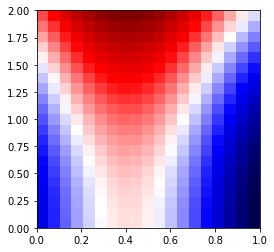

In [85]:
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111)
im1 = ax1.pcolor(XG, YG, field, cmap='seismic') # Restrict range of field with arguments vmin, vmax

We can make a nicer image if we interpolate the data onto a finer mesh, here given by $120 \times 122$ points.
There are numerous ways to do this. For 2D data it is simplest to use `scipy.interpolate.inter2d()`.
In the first step, we define an interpolant using a cubic spline. 
In the second step, we evaluate the interpolant on a new refined mesh (given by $120 \times 122$ points).

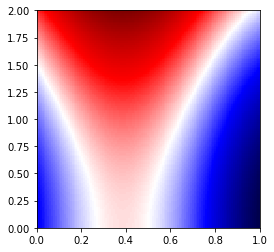

In [86]:
from scipy.interpolate import interp2d

# Define the interolant
x1, x2 = np.linspace(0.0, 1.0, 20), np.linspace(0.0, 2.0, 22)
interpolant_f = interp2d(x1, x2, field, kind='cubic') # Specify the 

# Perform the interpolation
x1r, x2r = np.linspace(0.0, 1.0, 120), np.linspace(0.0, 2.0, 122)
field2 = interpolant_f(x1r, x2r)

# Make the figure using the interpolated data
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111)
im1 = ax1.pcolormesh(x1r, x2r, field2, cmap='seismic') # Make even nicer / smoother using argument shading='gouraud'.

<a id='sec-viz'></a>

----
## Visualizing Data

### Working with VTK files

ParaView (https://www.paraview.org/) is an excellent visualization tool for 3-D datasets.
That said, it is not always easy to make publication quality figures with ParaView.
For 2-D datasets, this task is much easier using matplotlib.
Given a VTK file (we will work with `.vtu` files - for unstructured meshes), we can extract the mesh connectivity and the fields defined within it using Python. We do this using the package `vtk`. 
This package allows us to open and extract data. Then we push these fields into a matplotlib unstructured mesh object which can be used for plotting. `vtu_extract_element_connectivity()` pulls out the element-mesh connectivity table, `vtu_extract_fields()` will pull out all cell fields and point fields defined in the file.

In [87]:
# https://stackoverflow.com/questions/54044958/reading-data-from-a-raw-vtk-vtu-file
def vtu_extract_element_connectivity(fname):
    """
    Loads a vtu file, extracts the "connectivity" field and 
    converts the data into a NumPy array (int64).
    The element-vertex map is returned as a 2D ndarray.
    It is assumed that all cells are of the same VTK type.
    The "offset" field in the vtu file is processed and checked to ensure that 
    all cells are the same VTK type (e.g. triangle).
    
    Parameters:
    -----------
    fname : string
      Filename of a VTU file
      
    Returns:
    --------
    elmap : ndarray, shape = (ncells, npoints_per_cell)
        Element-vertex map associated with VTK cells, with dimensions (nCells, npoints_per_cell)
    """
    
    import vtk as vtk

    # Read the source vtu file.
    reader = vtk.vtkXMLUnstructuredGridReader()
    reader.SetFileName(fname)
    reader.Update() # Needed because of GetScalarRange
    output = reader.GetOutput()

    cells = output.GetCells()

    offset_per_cell = cells.IsHomogeneous()
    if offset_per_cell <= 0:
        raise ValueError('Require all cells have the same size (homogeneous).')

    nCells = cells.GetNumberOfCells()
    array = cells.GetConnectivityArray()
    elmap = np.asarray(array ,dtype=np.int64)
    elmap = elmap.reshape(nCells, offset_per_cell)
    return elmap

In [88]:
def vtu_extract_fields(fname, extract_coor=True):
    """
    Extract point fields, cell fields and point coordiantes from a vtu file.
    
    Parameters:
    -----------
    extract_coor : boolean
        Flag to indicate whether you want the coordinates to be extracted.
    
    Returns:
    --------
    point_field : dict
      All point fields found. Key is the name provided in the VTU file.
    cell_field : dict
      All cell fields found. Key is the name provided in the VTU file.
    coor_field : dict
      Coordinates of the mesh. `coor_field` be empty if extract_coor = False.
      Key used is "coor".
    """
    
    import vtk as vtk
    
    point_field = {}
    cell_field = {}
    coor_field = {}
    
    # Read the source vtu file.
    reader = vtk.vtkXMLUnstructuredGridReader()
    reader.SetFileName(fname)
    reader.Update() # Needed because of GetScalarRange
    output = reader.GetOutput()

    points = output.GetPoints()
    array = points.GetData()
    xyz = np.asarray(array, dtype=np.float64)
    if extract_coor:
        coor_field["coor"] = xyz
    
    pointFields = output.GetPointData()
    
    nfields = pointFields.GetNumberOfArrays()
    print('#point fields', nfields)
    for f in range(nfields):
        print('  pointFields.name', pointFields.GetArrayName(f))
        #print('pointFields.ndof', pointFields.GetNumberOfComponents(f))
        array = pointFields.GetArray(f)
        pf = np.asarray(array, dtype=np.float64)
        point_field[ pointFields.GetArrayName(f) ] = pf
        
    #cells = output.GetCells()
    cellFields = output.GetCellData()
    nfields = cellFields.GetNumberOfArrays()
    print('#cell fields', nfields)
    for f in range(nfields):
        print('  cellFields.name', cellFields.GetArrayName(f))
        array = cellFields.GetArray(f)
        cf = np.asarray(array, dtype=np.float64)
        cell_field[ cellFields.GetArrayName(f) ] = cf
        
    return point_field, cell_field, coor_field

An example usage of the above two functions is shown below.

In [89]:
e2v = vtu_extract_element_connectivity("sample_datasets/xt_dmtet.vtu")
pf, cf, coor = vtu_extract_fields("sample_datasets/xt_dmtet.vtu")

# See what we got
pf_names = list(pf.keys())
print('point fields found:', pf_names)
cf_names = list(cf.keys())
print('cell fields found:', cf_names)

#point fields 1
  pointFields.name t
#cell fields 0
point fields found: ['t']
cell fields found: []


Now we have pulled out the data from the `.vtu` file, we can plot it.
We can make a triangle mesh object using `matplotlib.tri.Triangulation()`.
The resulting mesh object, combined with a point field (here `'T'`) can be plotted using filled contours (for example) for a triangular mesh (`plt.tricontourf()`):

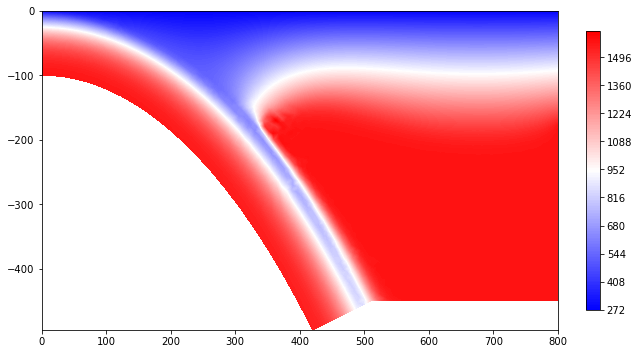

In [146]:
import matplotlib.tri as mtri

# Create a Triangulation() instance by supplying the coordinaates, and element-vertex connectivity.
tri = mtri.Triangulation(coor['coor'][:, 0], coor['coor'][:, 1], e2v)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
cfill = ax1.tricontourf(tri, pf['t'][:], levels=200, cmap='bwr')
fig.colorbar(cfill, ax=ax1, fraction=0.025);

Using `tricontourf()` with lots of levels (to make a smooth image) may be slow. 
You can also use a method like `pcolor`, but for unstructured triangle meshes called `plt.tripcolor()`.

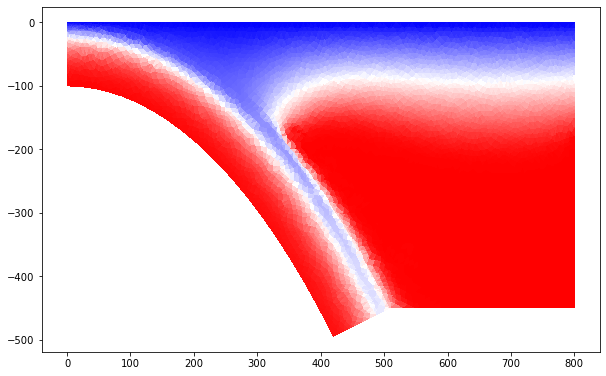

In [137]:
# Used this way, we provide CELL values on each triangle.
# plt.tripcolor() does not require a triangulation object used this way.
T_cell = np.zeros(e2v.shape[0])
T_cell = pf['t'][e2v]
T_cell = T_cell.mean(axis=1)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
cfill = ax1.tripcolor(coor['coor'][:, 0], coor['coor'][:, 1], e2v, T_cell, cmap='bwr')

Below, we use `plt.tripcolor()` with a triangulation object (`matplotlib.tri.Triangulation`) which here has the variable name `tri`. Because of this, coordinates do not have to be provided to the plotting function.
Furthermore, you also provide the field on each vertex in the mesh (and not the field value on each cell).

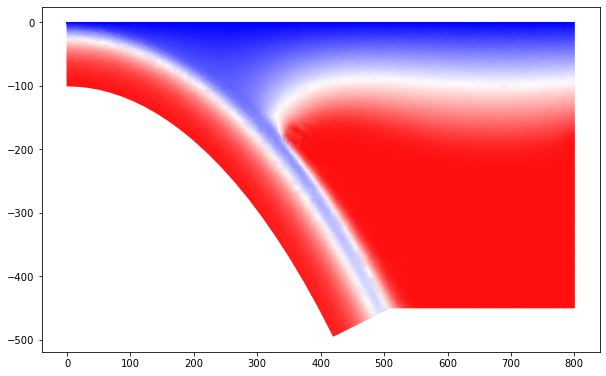

In [138]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(111)
ax1.set_aspect('equal')
cfill = ax1.tripcolor(tri, pf['t'][:], cmap='bwr', shading='gouraud')

You can build a transect throughout our unstructured mesh and interpolate values to it using `matplotlib.tri.LinearTriInterpolator()` or `matplotlib.tri.CubicTriInterpolator()`.
Below I give an example.

In [133]:
T = pf['t'][:]

# Create two transects

# Transect mis-aligned with x-y Cartesian coordinate system
nsample_points = 128
xt = np.linspace(310.0, 700.0, nsample_points)
yt = np.linspace(-300.0, -50.0, nsample_points)

# Transect parallel to the y axis
xt2 = np.linspace(375.0, 375.0, nsample_points)
yt2 = np.linspace(-300.0, -1.0, nsample_points)

# Create the interpolant (linear)
interp_lin = mtri.LinearTriInterpolator(tri, T)
zt_lin = interp_lin(xt, yt)
zt_lin2 = interp_lin(xt2, yt2)

# Create the interpolant (cubic)
interp_cubic_geom = mtri.CubicTriInterpolator(tri, T, kind='geom')
zt_cubic_geom = interp_cubic_geom(xt, yt)
zt_cubic_geom2 = interp_cubic_geom(xt2, yt2)

#interp_cubic_min_E = mtri.CubicTriInterpolator(tri, T, kind='min_E')
#zi_cubic_min_E = interp_cubic_min_E(xt, yt)

Below the results of the interpolated temperature values are shown, and lastly a plot displaying the location of the transects is provided.

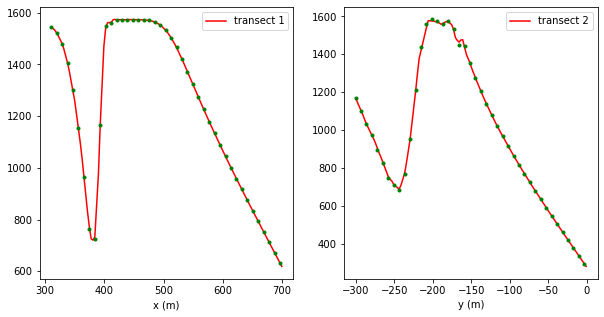

In [134]:
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(nrows=1, ncols=2)

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_subplot(gs[0, 0]) # Axis for row 0, col 0.
g1 = ax1.plot(xt, zt_lin, 'r-', label='transect 1');
g2 = ax1.plot(xt[::3], zt_cubic_geom[::3], 'g.');
ax1.set_xlabel('x (m)')
ax1.legend(loc='upper right');

ax2 = fig.add_subplot(gs[0, 1]) # Axis for row 0, col 0.
g3 = ax2.plot(yt2, zt_lin2, 'r-', label='transect 2');
g4 = ax2.plot(yt2[::3], zt_cubic_geom2[::3], 'g.');
ax2.set_xlabel('y (m)');
ax2.legend(loc='upper right');

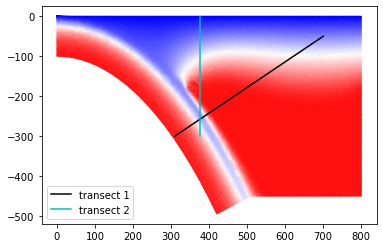

In [135]:
cfill = plt.tripcolor(tri, pf['t'][:], cmap='bwr', shading='gouraud')
g1 = plt.plot([xt[0], xt[-1]], [yt[0], yt[-1]], 'k-', label='transect 1');
g2 = plt.plot([xt2[0], xt2[-1]], [yt2[0], yt2[-1]], 'c-', label='transect 2');
plt.legend(loc='lower left');

### Unstructured point clouds

In this section we discuss 2-D viz techniques which can be useful when you have data, but no underlying mesh.
That is, we have a cloud of points in space with no known connectivity between them.

In [75]:
# Create some data. It lives on a mesh, but let's pretend it is unstructured.
xu = np.linspace(0.0, 1000.0, 32)
yu = np.linspace(0.0, 1000.0, 56)

xuG, yuG = np.meshgrid(xu, yu)
xuG = xuG.flatten()
yuG = yuG.flatten()

zuG = xuG**2 + yuG*1000

#### Triangulate ("by hand") and plot

We can create a triangulation from the point cloud, and the use `plt.tripcolor()` to plot `zuG`.

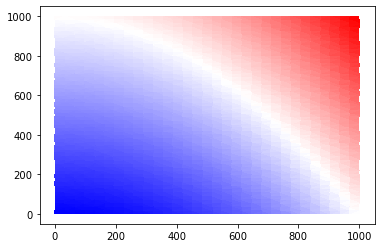

In [76]:
# Create the triangulation
utri = mtri.Triangulation(xuG, yuG)

# Plot the result
cfill = plt.tripcolor(utri, zuG, cmap='bwr', shading='flat')

#### Triangulate, interpolate onto a fine structured mesh (by hand) and plot

In [77]:
# Create the triangulation
interp = mtri.LinearTriInterpolator(utri, zuG)
#interp = mtri.CubicTriInterpolator(utri, zuG, kind='geom')

In [78]:
# Create the structured fine mesh
xr = np.linspace(0.0, 1000.0, 32*4)
yr = np.linspace(0.0, 1000.0, 56*4)
xrG, yrG = np.meshgrid(xr, yr)

# Interpolate
ziG = interp(xrG, yrG)

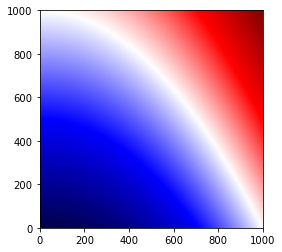

In [79]:
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111)
im1 = ax1.pcolormesh(xr, yr, ziG, cmap='seismic', shading='gouraud')

#### Triangulate, interpolate (using high level function) and then plot

We will use the method `scipy.interpolate.griddata()` from the package SciPy.

In [80]:
from scipy.interpolate import griddata

In [81]:
# Create a fine mesh
xr = np.linspace(0.0, 1000.0, 32*4)
yr = np.linspace(0.0, 1000.0, 56*4)
xrG, yrG = np.meshgrid(xr, yr)

grid_z2 = griddata((xuG, yuG), zuG, (xrG, yrG), method='cubic')

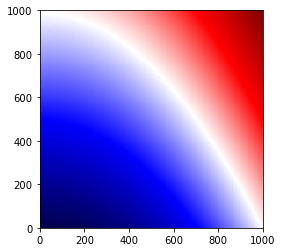

In [82]:
fig = plt.figure(figsize=(4, 4))
ax1 = fig.add_subplot(111)
im1 = ax1.pcolormesh(xr, yr, grid_z2, cmap='seismic', shading='flat')